## Agencia de Renta de Autos

#### Bases de Datos Avanzadas

##### Profesor Botello

###### Por: Inserte Nombre integrantes


En este trabajo vamos a enumerar los pasos a seguir para crear la base de Datos en MongoDB para asi poderla consultar a traves de este notebook escrito con el lenguaje Python

- Creamos un Archivo Generando Nombres de Empleados, Sucursales y Clientes a traves de iteraciones con Python y diccionarios obtenidos en la red
- Realizamos Web Scrapping , y obtenemos datos de renta de vehiculos para utilizar datos más precisos
- Exportamos a CSV los dataframes creados
- Importamos con la herramienta grafica de MongoDBCompass los csv y los agregamos a las tablas, más que nada las tablas catalogo
- Para las tablas que forman parte de la operacion en este documento iteraremos las diferentes operaciones con el fin de Generar datos lo más precisos posibles
- Vamos a contestar las preguntas generadas en las reglas de negocio apoyandonos de graficas a partir de la libreria matplotlib


#### Conexion a la Base de datos


In [349]:
# Creamos la base de datos
#import pymongo

#myclient = pymongo.MongoClient("mongodb://localhost:27017/")

#mydb = myclient["RentaVehiculos"]


In [350]:
import pymongo
import json
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
db = client['RentaVehiculos']
db


Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'RentaVehiculos')

In [351]:
print(db.list_collection_names())


['Autos', 'Reservacion', 'Clientes', 'Sucursales', 'Empleados']


![BasededatosCreada]("./ScreenShots/1.png")


In [352]:
from pprint import pprint
mycol = db["Clientes"]
y = mycol.count_documents({})
print("Numero de documentos :", y)
for x in mycol.find().limit(3):
    pprint(x)


Numero de documentos : 99
{'Apellido': 'Lillo Amo',
 'Direccion': 'CountryOlive',
 'Email': 'TSAT231020003588@outlook.com',
 'FechaNacimiento': '26/03/1997',
 'INE': '810515',
 'Idioma': 'Ingles/Español',
 'Nombre': 'Valentín',
 'RFC': 'VLIA26031997982',
 'Telefono': '55889597',
 '_id': ObjectId('629cc53dddb894567833c2b8')}
{'Apellido': 'Téllez',
 'Direccion': 'Street,VenezuelaHeather',
 'Email': 'YMAA050619819712@hotmail.com',
 'FechaNacimiento': '09/03/1976',
 'INE': '412346',
 'Idioma': 'Ingles',
 'Nombre': 'Regina',
 'RFC': 'RTÉL09031976739',
 'Telefono': '55951632',
 '_id': ObjectId('629cc53dddb894567833c2b9')}
{'Apellido': 'Rogelio Cuenca Roca',
 'Direccion': 'Lane,VenezuelaCedar',
 'Email': 'ADER260419991673@outlook.com',
 'FechaNacimiento': '19/12/1987',
 'INE': '409106',
 'Idioma': 'Español',
 'Nombre': 'Emigdio',
 'RFC': 'EROC19121987946',
 'Telefono': '55521701',
 '_id': ObjectId('629cc53dddb894567833c2ba')}


Checamos 3 vehiculos existentes


In [353]:
from pprint import pprint
mycolVehiculos = db["Autos"]
y = mycolVehiculos.count_documents({})
print("Numero de documentos :", y)
for x in mycolVehiculos.find().limit(3):
    pprint(x)


Numero de documentos : 30
{'Auto': ' Chevrolet Spark',
 'Color': 'Blanco',
 'Combustible': 'Gasolina',
 'Kilometraje': 30500,
 'Modelo': '2017',
 'Placa': '229-PKL',
 'Renta': 288,
 '_id': ObjectId('629cd257ddb894567833c352')}
{'Auto': ' Chevrolet Spark',
 'Color': 'Rojo',
 'Combustible': 'Gasolina',
 'Kilometraje': 28464,
 'Modelo': ' 2016',
 'Placa': '739-UH4',
 'Renta': 918,
 '_id': ObjectId('629cd257ddb894567833c353')}
{'Auto': ' Chevrolet Aveo',
 'Color': 'Gris',
 'Combustible': 'Diesel',
 'Kilometraje': 78158,
 'Modelo': ' 2016',
 'Placa': '443-GXS',
 'Renta': 520,
 '_id': ObjectId('629cd257ddb894567833c354')}


Creamos la tabla Reservaciones


In [354]:
#NuevaColeccionReservaciones = db["Reservaciones"]


Cargaremos en tres listas los diferentes ID para crear de manera dinamica la tabla de reservaciones


In [355]:
idCliente = []
mycol = db["Clientes"]
for x in mycol.find():
    idCliente.append((x["_id"]))


In [356]:
idAutos = []
colAutos = db["Autos"]
for x in colAutos.find():
    idAutos.append((x["_id"]))


In [357]:
idEmpleados = []
colEmpleados = db["Empleados"]
for x in colEmpleados.find():
    idEmpleados.append((x["_id"]))


In [358]:
#pip install faker

In [359]:

import json
import random as rd
import datetime
from datetime import date
from bson import json_util
import csv
from pathlib import Path
import pandas as pd
from faker import Faker
fake = Faker()
from datetime import datetime


In [360]:
def generarFechas():
     
    #start_date = datetime.date(year=2018, month=1, day=1)
    #end_date = datetime.date(year=2022, month=6, day=6)
    #inicio  = fake.date_between(start_date=, end_date=end_date)
    #fin  = fake.date_between(start_date=end_date, end_date='+2m')

    a  = fake.date_between_dates(date_start=datetime(2019,1,1), date_end=datetime(2019,12,31))
    b = fake.date_between_dates(date_start=datetime(2019,12,31), date_end=datetime(2020,6,12))
    
    return a,b   

    



In [361]:
generarFechas()

(datetime.date(2019, 11, 6), datetime.date(2020, 5, 11))

In [362]:
print(generarFechas()[0])
print(generarFechas()[1])

2019-06-23
2020-03-20


In [363]:
# Datos para ser escrito el diccionario que creara un dump de csv
idClientes = []
idVendedor = []
idVehiculo = []
StatusReserva = []
FechasSalida = []
FechasIngreso = []
rd.seed(3)
for x in range(40):
    idClientes.append(idCliente[rd.randint(0, len(idCliente)-1)])
    idVendedor.append(idEmpleados[rd.randint(0, len(idEmpleados)-1)])
    idVehiculo.append(idAutos[rd.randint(0, len(idAutos)-1)])
    StatusReserva.append(rd.randint(0, 3))
    FechasSalida.append(generarFechas()[0])
    FechasIngreso.append(generarFechas()[1])


In [364]:

Reservacion = pd.DataFrame(list(zip(idClientes, idVendedor, idVehiculo, StatusReserva, FechasSalida, FechasIngreso)),
                           columns=['idCliente', 'idEmpleado', 'idVehiculo', 'StatusReserva', 'FechaSalida', 'FechaIngreso'])

ReservacionDataFrame = Reservacion

ReservacionDataFrame


,idCliente,idEmpleado,idVehiculo,StatusReserva,FechaSalida,FechaIngreso
0,629cc53dddb894567833c2d6,629cc8a5ddb894567833c342,629cd257ddb894567833c363,1,2019-08-30,2020-01-24
1,629cc53dddb894567833c2e7,629cc8a5ddb894567833c343,629cd257ddb894567833c361,0,2019-10-14,2020-01-29
2,629cc53dddb894567833c305,629cc8a5ddb894567833c31d,629cd257ddb894567833c36f,3,2019-04-18,2020-05-06
3,629cc53dddb894567833c2d9,629cc8a5ddb894567833c340,629cd257ddb894567833c359,1,2019-01-14,2020-03-18
4,629cc53dddb894567833c313,629cc8a5ddb894567833c33b,629cd257ddb894567833c363,3,2019-05-16,2020-03-11
5,629cc53dddb894567833c2ea,629cc8a5ddb894567833c326,629cd257ddb894567833c359,1,2019-08-19,2020-05-12
6,629cc53dddb894567833c2fa,629cc8a5ddb894567833c335,629cd257ddb894567833c369,0,2019-09-02,2020-04-03
7,629cc53dddb894567833c30d,629cc8a5ddb894567833c321,629cd257ddb894567833c357,0,2019-01-13,2020-04-27
8,629cc53dddb894567833c2de,629cc8a5ddb894567833c31e,629cd257ddb894567833c36c,2,2019-09-21,2020-05-01
9,629cc53dddb894567833c2f4,629cc8a5ddb894567833c343,629cd257ddb894567833c369,3,2019-12-24,2020-05-23


In [365]:
# Autos
filepath = Path('CSV/Reservacion.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
Reservacion.to_csv(filepath)


In [366]:
# seleccionar cuantas veces se rento este carro 629cd257ddb894567833c35d
from bson.objectid import ObjectId
mycol2 = db["Reservacion"]
for x in mycol2.find({"idVehiculo": ObjectId("629cd257ddb894567833c365")}):
    pprint(x)


{'FechaIngreso': datetime.datetime(2022, 4, 20, 0, 0),
 'FechaSalida': datetime.datetime(2020, 3, 14, 0, 0),
 'StatusReserva': 2,
 '_id': ObjectId('629ceff1fdb2f724e1b127e2'),
 'idCliente': ObjectId('629cc53dddb894567833c316'),
 'idEmpleado': ObjectId('629cc8a5ddb894567833c328'),
 'idVehiculo': ObjectId('629cd257ddb894567833c365')}
{'FechaIngreso': datetime.datetime(2019, 3, 23, 0, 0),
 'FechaSalida': datetime.datetime(2019, 1, 22, 0, 0),
 'StatusReserva': 1,
 '_id': ObjectId('629ceff1fdb2f724e1b127e7'),
 'idCliente': ObjectId('629cc53dddb894567833c2f3'),
 'idEmpleado': ObjectId('629cc8a5ddb894567833c33b'),
 'idVehiculo': ObjectId('629cd257ddb894567833c365')}
{'FechaIngreso': datetime.datetime(2022, 1, 8, 0, 0),
 'FechaSalida': datetime.datetime(2021, 4, 15, 0, 0),
 'StatusReserva': 0,
 '_id': ObjectId('629ceff1fdb2f724e1b127f8'),
 'idCliente': ObjectId('629cc53dddb894567833c2bf'),
 'idEmpleado': ObjectId('629cc8a5ddb894567833c340'),
 'idVehiculo': ObjectId('629cd257ddb894567833c365')}

In [367]:
VecesQueSeUsoXAuto = {}
Reservacion = db["Reservacion"]
Autos = db["Autos"]
identificadoresVehiculos = []
AutosNombre = []
Numero = []


In [368]:
for x in Reservacion.find({}):
    identificadoresVehiculos.append((x["idVehiculo"]))


Concatenamos con el nombre de los autos

In [369]:
dataframeAutos = pd.DataFrame()
for x in identificadoresVehiculos:
    pipe2 = [{'$match': {'_id': ObjectId(x)}
            }
]
    result = Autos.aggregate(pipe2)
    #print(list(result))
    dataframeAutos = dataframeAutos.append(list(result), ignore_index=True)

In [370]:
dataframeAutos

,_id,Auto,Modelo,Renta,Color,Kilometraje,Combustible,Placa
0,629cd257ddb894567833c35c,Ford Fiesta,2012,463,Azul,88526,Gasolina,642-ZVT
1,629cd257ddb894567833c365,Fiat Uno,2019,741,Verde,59211,Gasolina,643-NZJ
2,629cd257ddb894567833c368,Nissan Versa,2017,794,Negro,58879,Gasolina,271-OFJ
3,629cd257ddb894567833c352,Chevrolet Spark,2017,288,Blanco,30500,Gasolina,229-PKL
4,629cd257ddb894567833c358,Chevrolet Beat,2019,368,Negro,23559,Diesel,281-2KS
...,...,...,...,...,...,...,...,...
95,629cd257ddb894567833c353,Chevrolet Spark,2016,918,Rojo,28464,Gasolina,739-UH4
96,629cd257ddb894567833c358,Chevrolet Beat,2019,368,Negro,23559,Diesel,281-2KS
97,629cd257ddb894567833c362,Volkswagen Vento,2018,677,Plateado,27327,Diesel,933-73P
98,629cd257ddb894567833c35d,Nissan Versa,2018,498,Azul,69325,Diesel,431-QXB


In [371]:
nombre_autos = dataframeAutos['Auto']
modelo = dataframeAutos['Modelo']

In [372]:
import pymongo
import pandas as pd
from bson.son import SON
df = pd.DataFrame()
ListaContadora = []
result = ""
for x in identificadoresVehiculos:
    pipe2 = [{'$match': {'idVehiculo': ObjectId(x)}
            },

    {"$group" : {"_id":"$_id"}
    },
    {'$count': "Numero de veces que aparece este auto"}
]

    result = Reservacion.aggregate(pipe2)
    pprint(list(result))
    df = df.append(list(result), ignore_index=True)

[{'Numero de veces que aparece este auto': 9}]
[{'Numero de veces que aparece este auto': 5}]
[{'Numero de veces que aparece este auto': 5}]
[{'Numero de veces que aparece este auto': 5}]
[{'Numero de veces que aparece este auto': 5}]
[{'Numero de veces que aparece este auto': 4}]
[{'Numero de veces que aparece este auto': 5}]
[{'Numero de veces que aparece este auto': 9}]
[{'Numero de veces que aparece este auto': 5}]
[{'Numero de veces que aparece este auto': 3}]
[{'Numero de veces que aparece este auto': 4}]
[{'Numero de veces que aparece este auto': 3}]
[{'Numero de veces que aparece este auto': 2}]
[{'Numero de veces que aparece este auto': 5}]
[{'Numero de veces que aparece este auto': 4}]
[{'Numero de veces que aparece este auto': 5}]
[{'Numero de veces que aparece este auto': 5}]
[{'Numero de veces que aparece este auto': 5}]
[{'Numero de veces que aparece este auto': 4}]
[{'Numero de veces que aparece este auto': 2}]
[{'Numero de veces que aparece este auto': 4}]
[{'Numero de 

In [373]:
#df

Contar las veces que se rento

In [374]:

import pymongo
import pandas as pd
from bson.son import SON
dfDos = pd.DataFrame()


resultDos = Reservacion.aggregate([
    {
        '$group': {
            '_id': '$idVehiculo', 
            'count': {
                '$sum': 1
            }
        }
    }
])
#pprint(list(resultDos))
for x in (list(resultDos)):
    print(x)
    dfDos = dfDos.append([x], ignore_index=True)

{'_id': ObjectId('629cd257ddb894567833c352'), 'count': 5}
{'_id': ObjectId('629cd257ddb894567833c364'), 'count': 3}
{'_id': ObjectId('629cd257ddb894567833c36c'), 'count': 1}
{'_id': ObjectId('629cd257ddb894567833c368'), 'count': 5}
{'_id': ObjectId('629cd257ddb894567833c36f'), 'count': 5}
{'_id': ObjectId('629cd257ddb894567833c369'), 'count': 4}
{'_id': ObjectId('629cd257ddb894567833c36b'), 'count': 3}
{'_id': ObjectId('629cd257ddb894567833c36a'), 'count': 2}
{'_id': ObjectId('629cd257ddb894567833c36e'), 'count': 4}
{'_id': ObjectId('629cd257ddb894567833c36d'), 'count': 1}
{'_id': ObjectId('629cd257ddb894567833c354'), 'count': 5}
{'_id': ObjectId('629cd257ddb894567833c356'), 'count': 1}
{'_id': ObjectId('629cd257ddb894567833c355'), 'count': 2}
{'_id': ObjectId('629cd257ddb894567833c357'), 'count': 2}
{'_id': ObjectId('629cd257ddb894567833c365'), 'count': 5}
{'_id': ObjectId('629cd257ddb894567833c363'), 'count': 4}
{'_id': ObjectId('629cd257ddb894567833c360'), 'count': 1}
{'_id': Object

In [375]:
dfDos = dfDos.join(nombre_autos)
dfDos = dfDos.join(modelo)

In [376]:
#df = df.join(nombre_autos)
#df = df.join(modelo)

In [377]:
dfDos["AB"] = dfDos["Auto"] + dfDos["Modelo"]

In [378]:
#df["AB"] = df["Auto"] + df["Modelo"]
#df

In [379]:
#import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = [20.50, 3.50]
#plt.rcParams["figure.autolayout"] = True
#df.head(100).plot(x ='AB', y='Numero de veces que aparece este auto', kind = 'bar')
#plt.show()

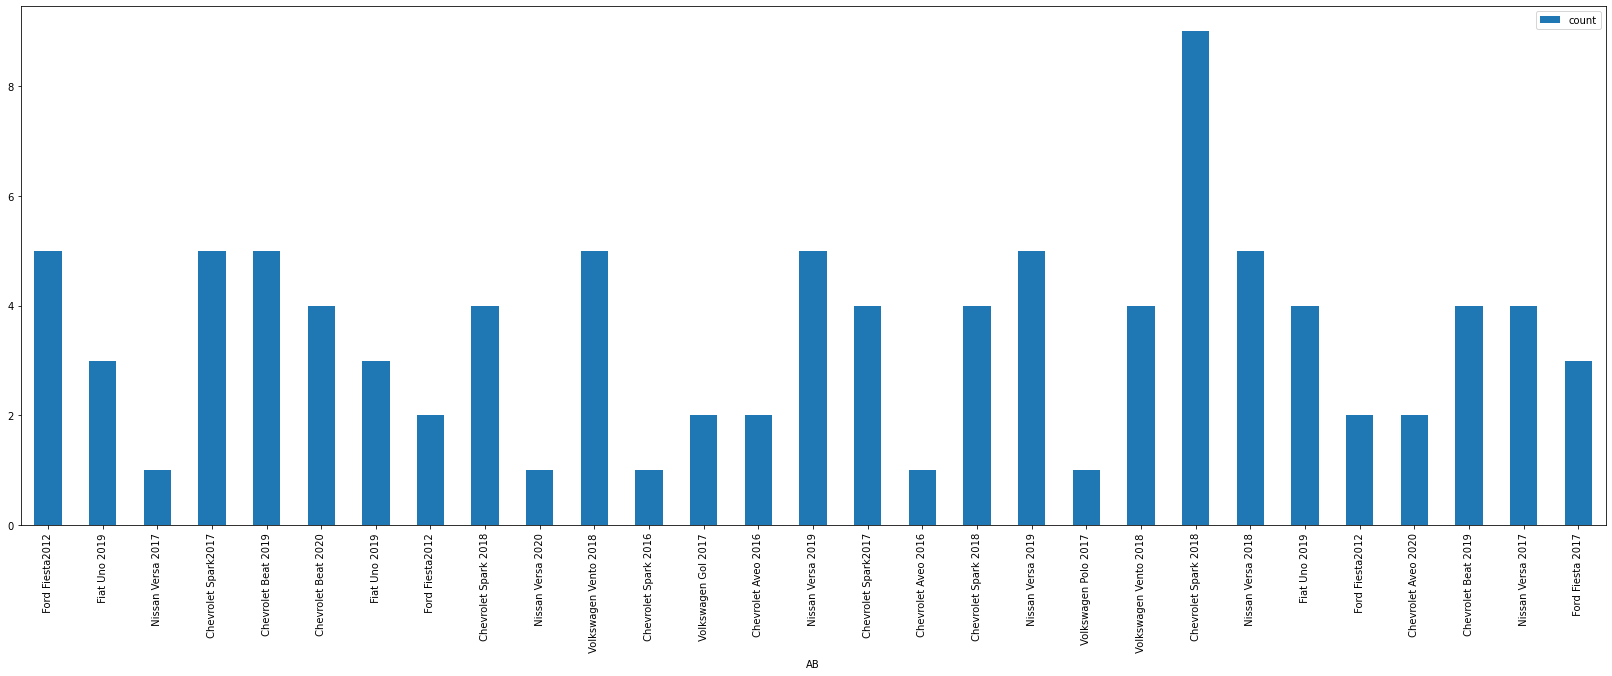

In [380]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [22.50, 9.50]
plt.rcParams["figure.autolayout"] = True
dfDos.head(100).plot(x ='AB', y='count', kind = 'bar')
plt.show()

In [381]:
# declarar consultar 10 autos mas rentados
#df.sort_values(by=['Numero de veces que aparece este auto'], inplace=True,ascending=False)

#df

In [382]:
MasRentados = dfDos.sort_values(by=['count'] , ascending=False).head(10)
print("10 Más rentados:")
pprint(MasRentados)

10 Más rentados:
                         _id  count               Auto Modelo  \
21  629cd257ddb894567833c35c      9    Chevrolet Spark   2018   
0   629cd257ddb894567833c352      5        Ford Fiesta   2012   
10  629cd257ddb894567833c354      5   Volkswagen Vento   2018   
22  629cd257ddb894567833c358      5       Nissan Versa   2018   
18  629cd257ddb894567833c367      5       Nissan Versa   2019   
14  629cd257ddb894567833c365      5       Nissan Versa   2019   
4   629cd257ddb894567833c36f      5     Chevrolet Beat   2019   
3   629cd257ddb894567833c368      5    Chevrolet Spark   2017   
17  629cd257ddb894567833c35e      4    Chevrolet Spark   2018   
8   629cd257ddb894567833c36e      4    Chevrolet Spark   2018   

                        AB  
21    Chevrolet Spark 2018  
0          Ford Fiesta2012  
10   Volkswagen Vento 2018  
22       Nissan Versa 2018  
18       Nissan Versa 2019  
14       Nissan Versa 2019  
4      Chevrolet Beat 2019  
3      Chevrolet Spark2017  
17    

In [383]:
#plt.rcParams["figure.figsize"] = [10.50, 3.50]
#plt.rcParams["figure.autolayout"] = True
#ten.plot(x ='AB', y='Numero de veces que aparece este auto', kind = 'bar')
#plt.show()

Generar Ticket de renta

In [384]:
dfTicket = pd.DataFrame()
listaTicket = []
coleccionTicket = db["Reservacion"]
for x in coleccionTicket.find():
   
    listaTicket.append(x)


In [385]:
dataframeTicket = dfTicket.append(listaTicket)

In [386]:
#dfTicket["Tiempo"] = dfTicket["FechaIngreso"] - dfTicket["FechaSalida"]
#dfTicket = dfTicket.join(modelo)
ReservacionDataFrame[['FechaSalida','FechaIngreso']] = ReservacionDataFrame[['FechaSalida','FechaIngreso']].apply(pd.to_datetime) #if conversion required
ReservacionDataFrame['Dias'] = (ReservacionDataFrame['FechaIngreso'] - ReservacionDataFrame['FechaSalida']).dt.days

Agregamos Autos a la tabla Reservaciones

In [394]:
baseUtos = db['Autos']
listaAutos =  pd.DataFrame()
listaNormalAutos = []
for x in ReservacionDataFrame['idVehiculo']:
    
    for y in baseUtos.find({"_id":ObjectId(x)}):
        listaNormalAutos.append(y)
        
listaAutos = listaAutos.append(listaNormalAutos)


ReservacionDataFrame = ReservacionDataFrame.join(listaAutos["Renta"])
ReservacionDataFrame = ReservacionDataFrame.join(listaAutos["Auto"])

Agregamos Clientes a la Tabla Reservaciones

In [395]:
baseClientes = db['Clientes']
listaClientes =  pd.DataFrame()
listaNormalClientes = []
for x in ReservacionDataFrame['idCliente']:
    
    for y in baseClientes.find({"_id":ObjectId(x)}):
        listaNormalClientes.append(y)
        
listaClientes = listaClientes.append(listaNormalClientes)

listaClientes["FullName"] = listaClientes['Nombre']+ ' ' +listaClientes['Apellido']
ReservacionDataFrame = ReservacionDataFrame.join(listaClientes["FullName"])

ValueError: columns overlap but no suffix specified: Index(['FullName'], dtype='object')

Usuarios que más días rentaron Autos

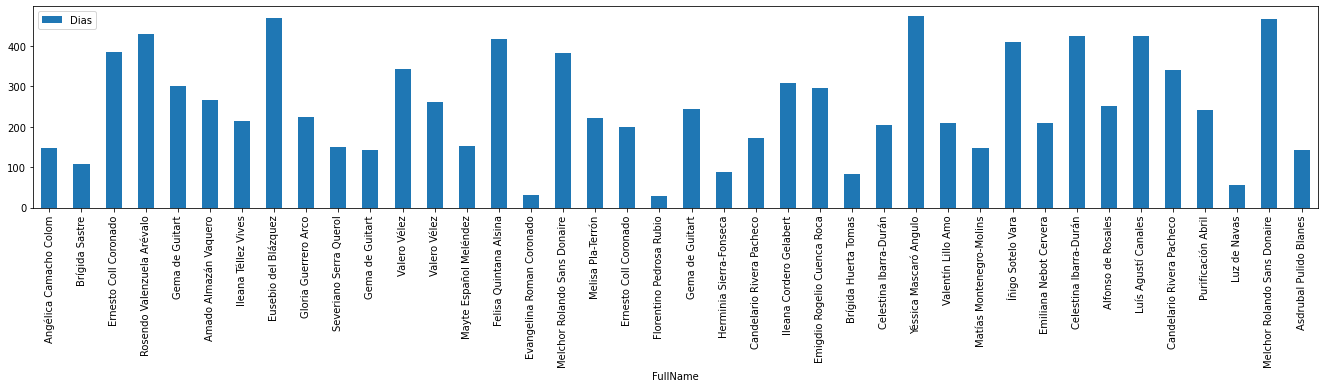

In [388]:
plt.rcParams["figure.figsize"] = [18.50, 5.50]
plt.rcParams["figure.autolayout"] = True
ReservacionDataFrame.plot(x ='FullName', y='Dias', kind = 'bar')
plt.show()

Organizar Por Fecha de Salida

In [389]:
ReservacionDataFrame["FechaSalida"] = pd.to_datetime(ReservacionDataFrame["FechaSalida"])
ReservacionDataFrame.sort_values(by="FechaSalida")


,idCliente,idEmpleado,idVehiculo,StatusReserva,FechaSalida,FechaIngreso,Dias,FullName
27,629cc53dddb894567833c2f8,629cc8a5ddb894567833c32c,629cd257ddb894567833c353,2,2019-01-09,2020-04-27,474,Yéssica Mascaró Angulo
7,629cc53dddb894567833c30d,629cc8a5ddb894567833c321,629cd257ddb894567833c357,0,2019-01-13,2020-04-27,470,Eusebio del Blázquez
3,629cc53dddb894567833c2d9,629cc8a5ddb894567833c340,629cd257ddb894567833c359,1,2019-01-14,2020-03-18,429,Rosendo Valenzuela Arévalo
16,629cc53dddb894567833c302,629cc8a5ddb894567833c32b,629cd257ddb894567833c36e,2,2019-01-22,2020-02-09,383,Melchor Rolando Sans Donaire
34,629cc53dddb894567833c307,629cc8a5ddb894567833c33d,629cd257ddb894567833c35a,3,2019-01-23,2020-03-23,425,Luís Agustí Canales
32,629cc53dddb894567833c2e8,629cc8a5ddb894567833c33a,629cd257ddb894567833c36d,3,2019-02-11,2020-04-11,425,Celestina Ibarra-Durán
38,629cc53dddb894567833c302,629cc8a5ddb894567833c331,629cd257ddb894567833c352,3,2019-03-02,2020-06-10,466,Melchor Rolando Sans Donaire
30,629cc53dddb894567833c2cb,629cc8a5ddb894567833c31f,629cd257ddb894567833c36d,2,2019-03-15,2020-04-28,410,Íñigo Sotelo Vara
11,629cc53dddb894567833c2c9,629cc8a5ddb894567833c334,629cd257ddb894567833c355,0,2019-04-17,2020-03-24,342,Valero Vélez
2,629cc53dddb894567833c305,629cc8a5ddb894567833c31d,629cd257ddb894567833c36f,3,2019-04-18,2020-05-06,384,Ernesto Coll Coronado


In [390]:
dfSalida = pd.DataFrame()
coleccionReservacion = db["Reservacion"]

pipeFechaSalida = [
    {
        '$group': {
            '_id': '$FechaSalida', 
            'count': {
                '$sum': 1
            }
        }
    }
]

resultadoSalida = coleccionReservacion.aggregate(pipeFechaSalida)
    #pprint(list(resultadoSalida))
dfSalida = dfSalida.append(list(resultadoSalida), ignore_index=True)


In [391]:
dfSalida.sort_values(by="count")

,_id,count
0,2019-02-25,1
64,2021-03-02,1
63,2020-04-21,1
62,2021-04-27,1
61,2022-03-01,1
...,...,...
28,2019-01-13,2
4,2019-03-13,2
2,2020-03-10,2
23,2022-03-26,2


En esta grafica se aprecia cuales han sido los dias que ha generado más rentas totales

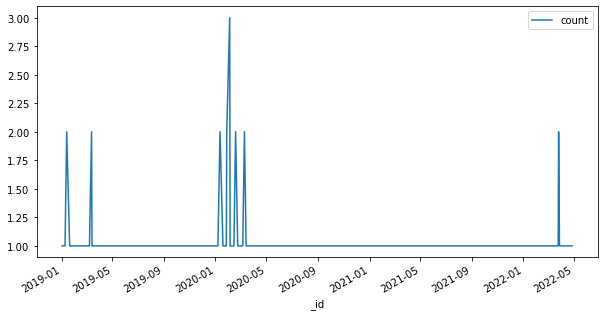

In [392]:
plt.rcParams["figure.figsize"] = [8.50, 4.50]
plt.rcParams["figure.autolayout"] = True
dfSalida.plot(x ='_id', y='count', kind = 'line')
plt.show()

In [399]:
ReservacionDataFrame

,idCliente,idEmpleado,idVehiculo,StatusReserva,FechaSalida,FechaIngreso,Dias,FullName,Renta,Auto
0,629cc53dddb894567833c2d6,629cc8a5ddb894567833c342,629cd257ddb894567833c363,1,2019-08-30,2020-01-24,147,Angélica Camacho Colom,704,Volkswagen Vento
1,629cc53dddb894567833c2e7,629cc8a5ddb894567833c343,629cd257ddb894567833c361,0,2019-10-14,2020-01-29,107,Brígida Sastre,878,Chevrolet Beat
2,629cc53dddb894567833c305,629cc8a5ddb894567833c31d,629cd257ddb894567833c36f,3,2019-04-18,2020-05-06,384,Ernesto Coll Coronado,871,Chevrolet Spark
3,629cc53dddb894567833c2d9,629cc8a5ddb894567833c340,629cd257ddb894567833c359,1,2019-01-14,2020-03-18,429,Rosendo Valenzuela Arévalo,871,Volkswagen Gol
4,629cc53dddb894567833c313,629cc8a5ddb894567833c33b,629cd257ddb894567833c363,3,2019-05-16,2020-03-11,300,Gema de Guitart,704,Volkswagen Vento
5,629cc53dddb894567833c2ea,629cc8a5ddb894567833c326,629cd257ddb894567833c359,1,2019-08-19,2020-05-12,267,Amado Almazán Vaquero,871,Volkswagen Gol
6,629cc53dddb894567833c2fa,629cc8a5ddb894567833c335,629cd257ddb894567833c369,0,2019-09-02,2020-04-03,214,Ileana Téllez Vives,794,Nissan Versa
7,629cc53dddb894567833c30d,629cc8a5ddb894567833c321,629cd257ddb894567833c357,0,2019-01-13,2020-04-27,470,Eusebio del Blázquez,331,Dodge Attitude
8,629cc53dddb894567833c2de,629cc8a5ddb894567833c31e,629cd257ddb894567833c36c,2,2019-09-21,2020-05-01,223,Gloria Guerrero Arco,871,Nissan Sentra
9,629cc53dddb894567833c2f4,629cc8a5ddb894567833c343,629cd257ddb894567833c369,3,2019-12-24,2020-05-23,151,Severiano Serra Querol,794,Nissan Versa


Realizamos multilpicacion de dias por precio de renta

In [411]:
ReservacionDataFrame["CostoTotal"] = ReservacionDataFrame['Dias']*ReservacionDataFrame['Renta']

Agregamos Columna e imprimimos el cliente que ha gastado más dinero en renta individual de automovil

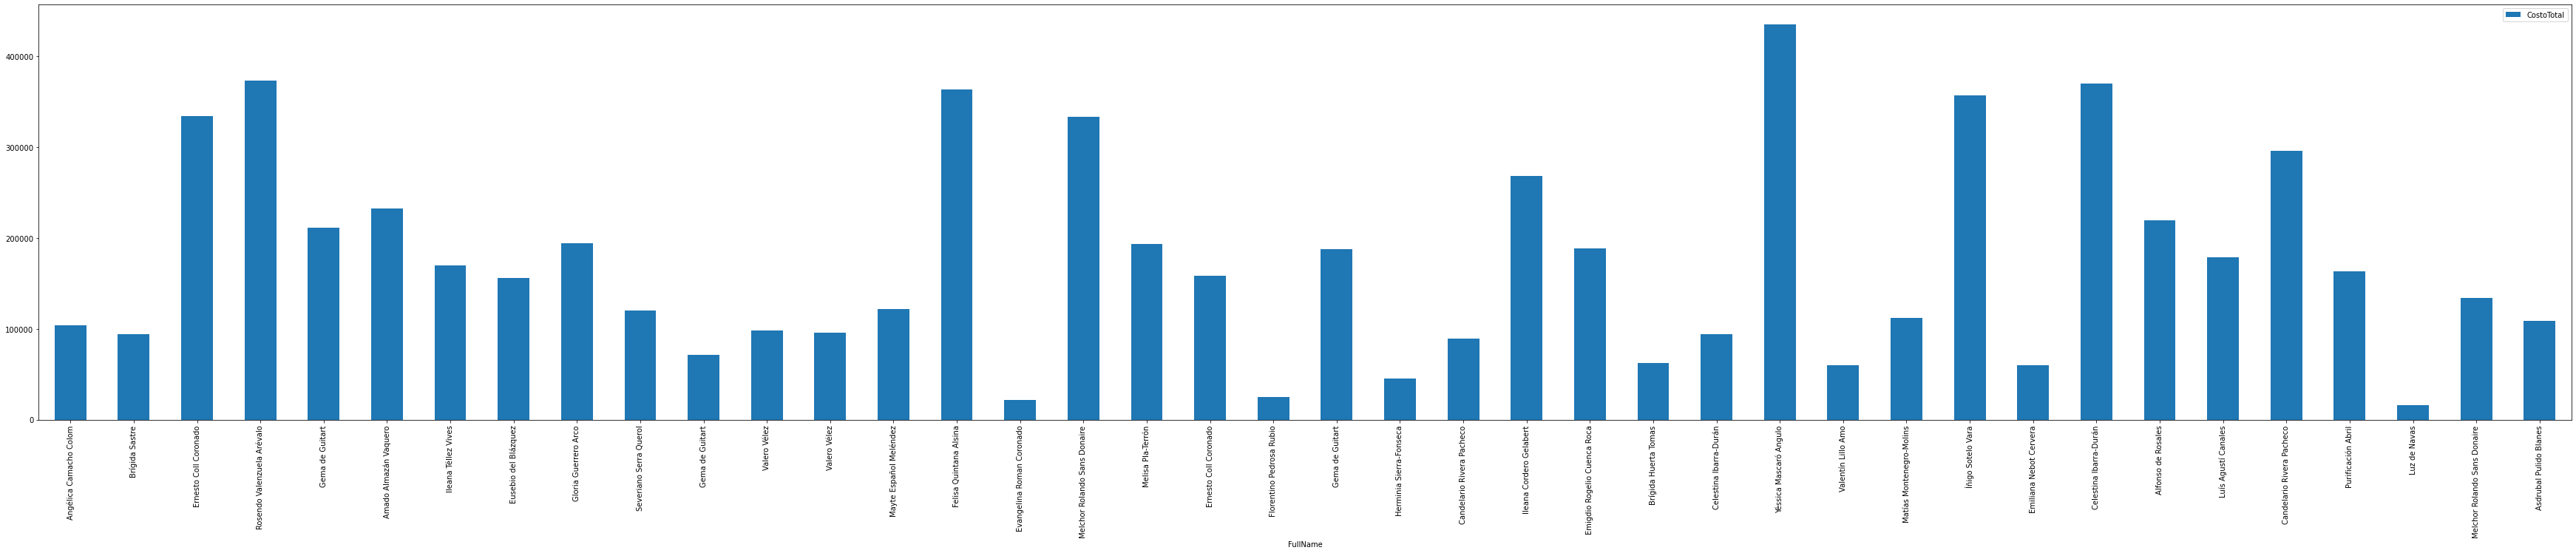

In [425]:
plt.rcParams["figure.figsize"] = [48.50, 10.50]
plt.rcParams["figure.autolayout"] = True
ReservacionDataFrame.plot(x ='FullName', y='CostoTotal', kind = 'bar')
plt.show()